미국 SSN에 등록된 신생아 이름 데이터

데이터 분석
- groupby()
- pivot_table()
- searchsorted()
- map()
- pyplot.suptitle()

In [2]:
#colab에서 한글 사용하기
!apt install fonts-nanum* #Colab 환경에 나눔 폰트 설치
!rm ~/.cache/matplotlib -rf #matplotlib에서 사용하기 위해, 기존 폰트 정보를 삭제

#이후 런타임 재실행, 재실행 안 할 경우, matplotlib에서 한글이 출력되지 않음
#메뉴 - 런타임 - 런타임 다시 시작 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [3]:
#필요한 모듈 import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

In [4]:
#구글 드라이브 마운트
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/데청캠2022/name'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
plt.rc('font', family='NanumBarunGothic')#폰트 설정
plt.rc('figure', figsize=(10, 6))#차트 기본 크기 설정

In [6]:
#1880년 신생아 이름 출력 - 
df_names1880 = pd.read_csv(path + '/yob1880.txt', names=['name', 'gender', 'number'])
df_names1880

,name,gender,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [7]:
#성별 신생아 수 : groupby()로 성별 기준으로 DataFrame 합침
df_names1880.groupby('gender')['number'].sum()

gender
F     90994
M    110490
Name: number, dtype: int64

In [8]:
#전체 이름 불러오기
years = range(1880, 2022)
pieces = list()
columns = ['name', 'gender', 'number']

for year in years:
  print(year, end=": ") #몇 년도 자료 불러오는 중인지 출력
  df_names = pd.read_csv(path + '/yob' + str(year) +'.txt', names=columns)
  df_names['year'] = year #year column을 추가해 몇년도 이름인지 파악할 수 있게 함
  pieces.append(df_names) #pieces 리스트에 for문으로 가져온 자료 하나씩 append

#concat()은 여러 개의 DataFrame을 합치고 매개변수 ignore_index=True를 통해 년도별 index 정보 무시
df_names_all = pd.concat(pieces, ignore_index=True) #모든 df_names가 담긴 pieces를 하나의 DataFrame으로 합침

1880: 1881: 1882: 1883: 1884: 1885: 1886: 1887: 1888: 1889: 1890: 1891: 1892: 1893: 1894: 1895: 1896: 1897: 1898: 1899: 1900: 1901: 1902: 1903: 1904: 1905: 1906: 1907: 1908: 1909: 1910: 1911: 1912: 1913: 1914: 1915: 1916: 1917: 1918: 1919: 1920: 1921: 1922: 1923: 1924: 1925: 1926: 1927: 1928: 1929: 1930: 1931: 1932: 1933: 1934: 1935: 1936: 1937: 1938: 1939: 1940: 1941: 1942: 1943: 1944: 1945: 1946: 1947: 1948: 1949: 1950: 1951: 1952: 1953: 1954: 1955: 1956: 1957: 1958: 1959: 1960: 1961: 1962: 1963: 1964: 1965: 1966: 1967: 1968: 1969: 1970: 1971: 1972: 1973: 1974: 1975: 1976: 1977: 1978: 1979: 1980: 1981: 1982: 1983: 1984: 1985: 1986: 1987: 1988: 1989: 1990: 1991: 1992: 1993: 1994: 1995: 1996: 1997: 1998: 1999: 2000: 2001: 2002: 2003: 2004: 2005: 2006: 2007: 2008: 2009: 2010: 2011: 2012: 2013: 2014: 2015: 2016: 2017: 2018: 2019: 2020: 2021: 

In [9]:
df_names_all

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


In [27]:
#연도별 신생아 수 - pivot_table(): DataFrame 'number'를 index='year'에 따른 columns='gender' 값의 sum을 나타내주세요
total_births = df_names_all.pivot_table('number', index='year', columns='gender', aggfunc=sum)

#total_births.head() or total_birth.tail()로 앞, 뒤 데이터 확인 가능
total_births

gender,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414


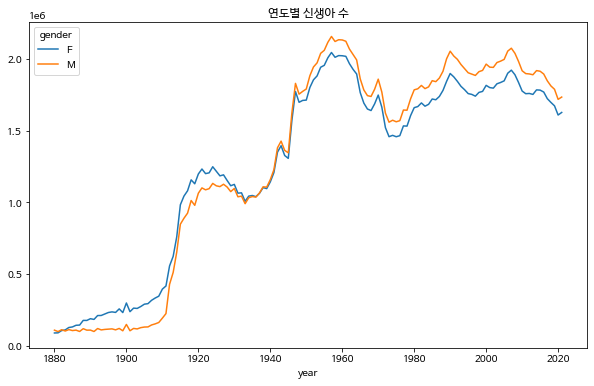

In [26]:
total_births.plot(title='연도별 신생아 수')#plot 제목 설정
plt.show()

In [31]:
#각 이름이 전체 신생아 수에서 차지하는 비율 - prop()
def add_prop(group):
  group['prop'] = group['number'] / group['number'].sum()
  return group

df_names_prop = df_names_all.groupby(['year', 'gender']).apply(add_prop)
df_names_prop

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [23]:
#비율의 합 출력: 연도와 성별로 나눈 모든 비율의 합이 1인지 확인 통해 이상 있는지 확인
df_names_prop.groupby(['year', 'gender'])['prop'].sum() 

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2019  M         1.0
2020  F         1.0
      M         1.0
2021  F         1.0
      M         1.0
Name: prop, Length: 284, dtype: float64

In [33]:
#각 이름이 차지하는 비율 중 상위 1000개
pieces = list()

#예시: year_gender에 2021, M이 들어가면 year_gender의 data가 group이 되고 이를 내림차순으로 정렬했을 때 상위 1000개만 잘라서 append 함
for year_gender, group in df_names_prop.groupby(['year', 'gender']):
  pieces.append(group.sort_values(by='number', ascending=False)[:1000])

top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [38]:
#연도별 선호하는 신생아 이름 상위 1000개
top1000_boys = top1000[top1000['gender'] == 'M']
top1000_boys

,name,gender,number,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [39]:
#연도별 선호하는 신생아 이름 상위 1000개
top1000_girls = top1000[top1000['gender'] == 'F']
top1000_girls

,name,gender,number,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
282871,Soleil,F,255,2021,0.000157
282872,Sandra,F,255,2021,0.000157
282873,Eleanora,F,255,2021,0.000157
282874,Aarya,F,255,2021,0.000157


In [44]:
#연도별 선호하는 이름 변화 - subplots()
total_number = top1000.pivot_table('number', index='year', columns='name', aggfunc=sum)
total_number

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4185.0,NaN,526.0,NaN,7211.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,NaN,5982.0,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3654.0,NaN,419.0,NaN,5529.0,NaN,NaN,NaN,...,265.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


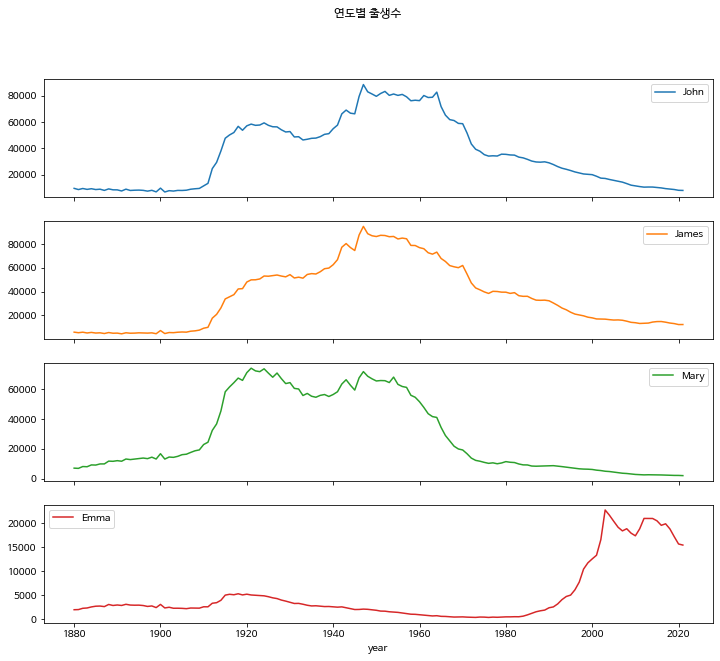

In [49]:
subset = total_number[['John', 'James', 'Mary', 'Emma']]

#subplots=True 설정하면 그래프를 나눠서 그림
subset.plot(subplots=True, figsize=(12,10), title='연도별 출생수')
plt.show()

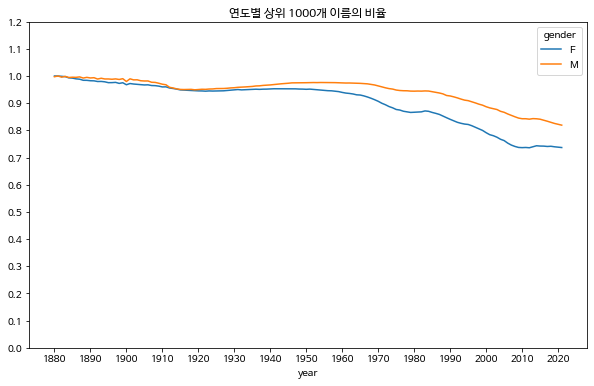

In [46]:
#신생아 이름의 다양성 분석
table = top1000.pivot_table('prop', index='year', columns='gender', aggfunc=sum)

table.plot(title='연도별 상위 1000개 이름의 비율', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 10))

plt.show()

In [64]:
#2021년 상위 1000개 이름의 통계
df = top1000_boys[top1000['year'] == 2021]
df_prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name,gender,number,year,prop
282876,Liam,M,20272,2021,0.011689
282877,Noah,M,18739,2021,0.010805
282878,Oliver,M,14616,2021,0.008428
282879,Elijah,M,12708,2021,0.007328
282880,James,M,12367,2021,0.007131
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


In [68]:
#prop 값 내림차순 정률 후 상위 10개 출력
df_prop_cumsum[:166]

282876    0.011689
282877    0.022494
282878    0.030922
282879    0.038249
282880    0.045380
            ...   
283037    0.494370
283038    0.495730
283039    0.497081
283040    0.498431
283041    0.499779
Name: prop, Length: 166, dtype: float64

In [69]:
#50% 지점 출력
df_prop_cumsum.values.searchsorted(0.5)

166

In [70]:
#1921년 상위 1000개 이름의 통계
df = top1000_boys[top1000['year'] == 1921]
df_prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name,gender,number,year,prop
82876,John,M,58214,1921,0.052852
82877,Robert,M,52783,1921,0.047921
82878,William,M,51863,1921,0.047086
82879,James,M,49750,1921,0.045167
82880,Charles,M,29242,1921,0.026548
...,...,...,...,...,...
83871,Hideo,M,50,1921,0.000045
83872,Junious,M,50,1921,0.000045
83873,Garnet,M,50,1921,0.000045
83874,Fidel,M,50,1921,0.000045


In [71]:
df_prop_cumsum[:29]

82876    0.052852
82877    0.100773
82878    0.147858
82879    0.193025
82880    0.219574
82881    0.244520
82882    0.268290
82883    0.287190
82884    0.302358
82885    0.317226
82886    0.331123
82887    0.343662
82888    0.356169
82889    0.368124
82890    0.379930
82891    0.391411
82892    0.401771
82893    0.411536
82894    0.421093
82895    0.430316
82896    0.439150
82897    0.447285
82898    0.455329
82899    0.462409
82900    0.469459
82901    0.476466
82902    0.483469
82903    0.490125
82904    0.496705
Name: prop, dtype: float64

In [72]:
df_prop_cumsum.values.searchsorted(0.5)

29

In [78]:
#다시 신생아 이름의 다양성 분석
#상위 50% 지점을 찾는 메소드 get_quanitle_count 선언
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by='prop', ascending=False)
  return group.prop.cumsum().values.searchsorted(q) + 1

In [80]:
diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')

diversity

gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2017,254,143
2018,259,149
2019,264,155


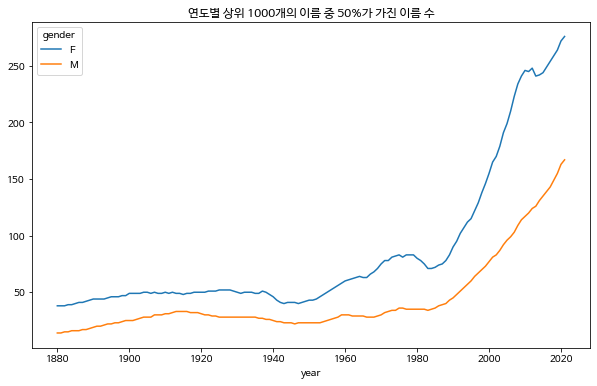

In [81]:
diversity.plot(title='연도별 상위 1000개의 이름 중 50%가 가진 이름 수')
plt.show()
#이름의 다양성이 증가함

In [95]:
#신생아 이름의 마지막 글자의 변화
get_last_letter = lambda x: x[-1]
last_letters = df_names_all['name'].map(get_last_letter)

last_letters.name = 'last_letter'

table = df_names_all.pivot_table('number', index=last_letters, columns=['gender', 'year'], aggfunc=sum)
table

gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                                  ...         M                      \
year            1887     1888     1889  ...      2012      2013      2014   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27227.0   27473.0   28318.0   
b                NaN      NaN      NaN  ...   34745.0   33278.0   31410.0   
c                NaN      NaN      NaN  ...   24293.0   24090.0   23847.0   
d             1027.0   1298.0   1374.0  ...   42520.0   42719.0   44077.0   
e            54353.0  66748.0  66662.0  ...  128591.0  132323.0  132195.0   
f                NaN      NaN      NaN  ...    2482.0    2593.0    2882.0   
g               25.0     44.0     28.0  ...    3807.0    4430.0    4724.0   
h             7141.0   8630.0   8825.0  ...   99135.0  100022.0  102156.0   
i              105.0    141.0    134.0  ...   47156.0   45456.0   46634.0   
j                NaN      NaN      NaN  ...    1500.0    1405.0    1360.0   
k               19.0     21.0     22.0  ...   34141.0   34887.0   35794.0   
l             6174.0   7900.0   8395.0  ...  129078.0  126884.0  127612.0   
m               90.0    123.0    137.0  ...   55109.0   57108.0   58765.0   
n             5512.0   6832.0   7103.0  ...  682713.0  669666.0  673646.0   
o               97.0    134.0    142.0  ...   78259.0   79519.0   82402.0   
p                NaN      NaN      NaN  ...    2527.0    2598.0    2524.0   
q                NaN      NaN      NaN  ...     337.0     336.0     312.0   
r              910.0   1207.0   1214.0  ...  167657.0  170458.0  178236.0   
s             2803.0   3581.0   3569.0  ...  122072.0  123889.0  128272.0   
t             3140.0   3816.0   3784.0  ...

In [89]:
#신생아 이름의 마지막 글자의 비율
subtable = table.reindex(columns=[1900, 1930, 1960, 1990, 2020], level='year')

letter_prop = subtable / subtable.sum()
letter_prop

gender         F                                                 M            \
year        1900      1930      1960      1990      2020      1900      1930   
name                                                                           
a       0.299870  0.256127  0.341882  0.378838  0.382010  0.005782  0.003250   
b            NaN  0.000018  0.000343  0.000082  0.000329  0.002472  0.002753   
c            NaN  0.000012  0.000024  0.000194  0.000554  0.001987  0.001627   
d       0.012242  0.010779  0.001846  0.001339  0.002368  0.102893  0.166919   
e       0.357133  0.271315  0.215138  0.178448  0.177215  0.151013  0.120166   
f            NaN       NaN  0.000010  0.000017  0.000100  0.000771  0.000420   
g       0.000110  0.000079  0.000157  0.000365  0.000441  0.001681  0.001265   
h       0.051035  0.035044  0.036223  0.045091  0.069228  0.041428  0.043037   
i       0.001201  0.001963  0.039963  0.024046  0.047694  0.001030  0.000631   
j            NaN       NaN       NaN  0.000010  0.000088       NaN       NaN   
k       0.000100  0.000208  0.000155  0.000255  0.000360  0.040365  0.030822   
l       0.048884  0.024794  0.033871  0.034460  0.021234  0.061857  0.063421   
m       0.001024  0.001377  0.008611  0.001287  0.004165  0.071792  0.049155   
n       0.060899  0.107495  0.130675  0.114866  0.113894  0.137616  0.139055   
o       0.001161  0.003688  0.002440  0.001479  0.002169  0.011743  0.018595   
p            NaN  0.000025  0.000023  0.000042  0.000094  0.002871  0.003564   
q            NaN       NaN       NaN       NaN  0.000042       NaN       NaN   
r       0.012092  0.010176  0.006766  0.036490  0.033279  0.068356  0.046802   
s       0.031518  0.067705  0.012764  0.008353  0.011786  0.133236  0.128170   
t       0.023229  0.026162  0.015198  0.005246  0.014757  0.068157  0.091740   
u       0.001167  0.000794  0.000575  0.000202  0.000668  0.000179  0.000196   
v            NaN       NaN  0.000060  0.000003  0.000294  0.000126  0.000046   
w       0.000020  0.000051  0.000031  0.000205  0.004174  0.006307  0.003887   
x            NaN  0.000029  0.000037  0.000299  0.002094  0.003509  0.002818   
y       0.096280  0.180887  0.152551  0.167569  0.110301  0.084677  0.081419   
z       0.002035  0.001272  0.000658  0.000815  0.000659  0.000153  0.000240   

gender                                
year        1960      1990      2020  
name                                  
a       0.002446  0.025408  0.019671  
b       0.001834  0.013619  0.010515  
c       0.007250  0.014112  0.009691  
d       0.122940  0.049677  0.022625  
e       0.083838  0.071390  0.067766  
f       0.004330  0.000655  0.001584  
g       0.009489  0.002686  0.002668  
h       0.037912  0.030185  0.054557  
i       0.000610  0.004286  0.032479  
j            NaN  0.000231  0.000850  
k       0.049374  0.027887  0.020387  
l       0.104892  0.094453  0.065405  
m       0.033831  0.023919  0.032879  
n       0.152513  0.254475  0.314598  
o       0.012841  0.033246  0.060123  
p       0.005674  0.003878  0.001514  
q            NaN  0.000084  0.000192  
r       0.031044  0.077035  0.095177  
s       0.102699  0.084398  0.077977  
t       0.065646  0.036193  0.032806  
u       0.000057  0.000695  0.003373  
v       0.000036  0.000165  0.001691  
w       0.007707  0.040380  0.009996  
x       0.001851  0.004810  0.011664  
y       0.161003  0.104797  0.047805  
z       0.000184  0.001336  0.002009

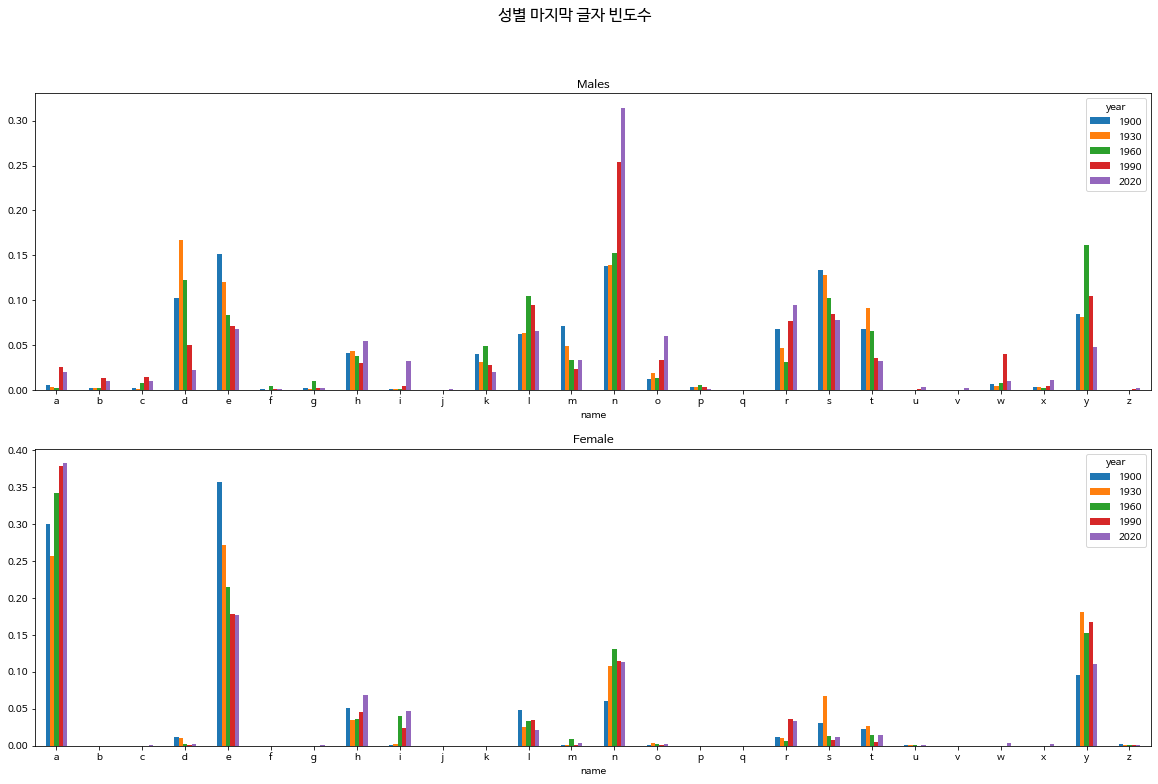

In [96]:
#다시 신생아 이름의 마지막 글자의 변화
fig, axes = plt.subplots(2, 1, figsize=(20,12))

fig.suptitle('성별 마지막 글자 빈도수', fontsize=16)

#rot 미설정시 글씨가 옆으로 누워서 출력됨
letter_prop['M'].plot.bar(ax=axes[0], title='Males', rot=0)
letter_prop['F'].plot.bar(ax=axes[1], title='Female', rot=0)

plt.show()

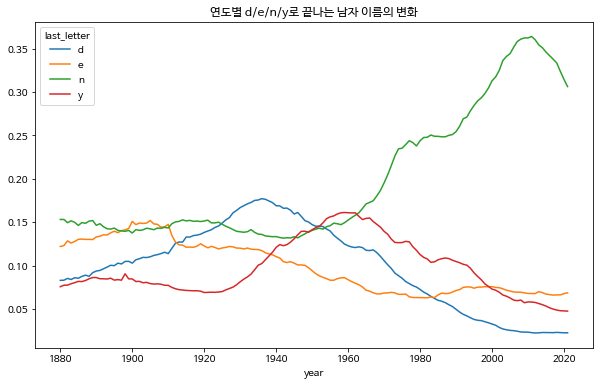

In [97]:
#신생아 이름 중 흔한 마지막 글자 d/e/n/y
letter_prop = table / table.sum()

deny_t = letter_prop.loc[['d', 'e', 'n', 'y'], 'M'].T

deny_t.plot(title='연도별 d/e/n/y로 끝나는 남자 이름의 변화')
plt.show()

In [98]:
#남자 신생아 이름과 여자 신생아 이름이 바뀐 경우 - 전체 이름 중, lesl이라는 문자열이 들어간 이름만 추출
all_names = pd.Series(top1000['name'].unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

filtered = top1000[top1000['name'].isin(lesley_like)]
filtered.groupby('name')['number'].sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: number, dtype: int64

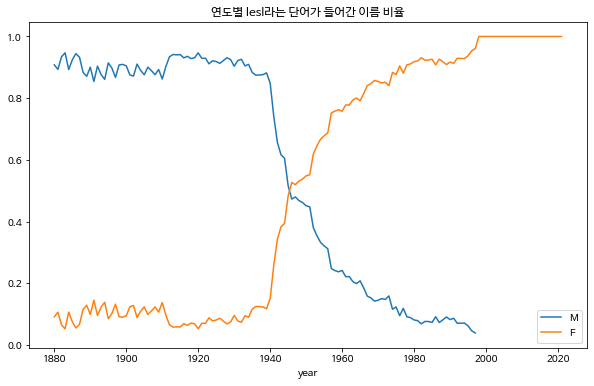

In [102]:
table = filtered.pivot_table('number', index='year', columns='gender', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

table['M'].plot()
table['F'].plot()
plt.title('연도별 lesl라는 단어가 들어간 이름 비율')
plt.legend()
plt.show()